> ## **Métodos Computacionales II - Taller #2**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [1]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

>**Sección 2.9.2**

---

**1. Estabilidad I:** Usando el código de clase, estudie la estabilidad de los algoritmos Runge-Kutta de tercer y cuarto orden. Realice las gráficas y suposiciones que considere necesarias.

---

**2. Estabilidad II:** Para el algoritmo de Verlet:

**(a).** Muestre que el error del método está descrito por:

$$\epsilon_{n + 1} = (2 + h^{2}a_{n}') \cdot \epsilon_{n} + \epsilon_{n - 1} = 0 \qquad a_{n}' = \frac{\partial{a}}{\partial{x}}.$$


---

**(b).** Para el caso de un oscilador armónico clásico muestre que:

$$\epsilon_{n + 1} = 2 \cdot (1 - R) \cdot \epsilon_{n} + \epsilon_{n - 1} = 0$$

donde $2R = h^{2}\omega^{2}$


---

**(c).** Usando la suposición de la función potencia $\epsilon_{n} = \epsilon_{0}\lambda^{n}$, muestre que las raíces son:

$$\lambda_{\pm} = 1 - R \pm \sqrt{R^{2} - 2R}$$


---
**(d).** El valor de la estabilidad se obtiene para $\left|{\lambda_\pm}\right| = 1$. Muestre que el paso de integración debe cumplir:

$$h \leq \frac{2}{\omega}$$


---

**(e).** Implemente una rutina sencilla del método de Verlet para el oscilador armónico y muestre en una animación el comportamiento en la región estable y en la región inestable. Use $x(0) = 1$, $\dot{x}(0) = 1$ y $\omega = \pi$. Itere el tiempo suficiente para evidenciar el comportamiento de la estabilidad.



---

**3.** Resolver analíticamente la ecuación diferencial de Riccati:

$$x^{3}y' = x^{4}y^{2} - 2x^{2}y - 1$$

Una solución particular esta dada por: $y_{1} = x^{-2}$. Encuentre numéricamente la solución usando alguno de los métodos vistos en clase con la condición inicial $y(\sqrt{2}) = 0.$

> **Solución:**

Teniendo en cuenta de que se trata de una ecuación de Riccati, se puede conseguir una expresión equivalente multiplicando a ambos lados por $x^{-3}$, obteniendo: $$ y' = xy^2 - \frac{2y}{x} - \frac{1}{x^3}$$ Tomando, entonces, que $y = y_1 + z$, se tiene que $$ y'_1 + z' = x(y_1 + z)^2 - \frac{2}{x}(y_1 + z) - \frac{1}{x^3} $$ expandiendo se obtiene que: 
$$ y'_1 + z' = xy_1^2 + 2xy_1z + xz^2 - \frac{2y_1}{x} - \frac{2z}{x} - \frac{1}{x^3}.$$ Usando que $y_1$ es solución a la ecuación diferencial, la ecuación se puede reducir a:
$$z' = \left(2xy_1 -\frac{2}{x}\right)z + xz^2 $$ Además, reemplazando $y_1 = x^{-2}$: 
$$z' = xz^2$$ Ahora, tómese $z = u^{-1} \implies z' = u^{-2}u'$. Entonces
$$-u^{-2}u' = xu^{-2} \leftrightarrow u' = x \implies u = -\frac{x^2}{2} + c_1$$ Entonces, $z = \left(-\frac{x^2}{2} + c_1\right)^{-1}$ Por lo que la solución general de la EDO, es $$y = x^{-2} + \left(-\frac{x^2}{2} + c_1\right)^{-1}$$ Tomando la condición inicial $$0 = \frac{1}{2} + \frac{1}{-1 + c_1} \implies c_1 = -1.$$ La solución es, entonces $$\boxed{y = x^{-2} - \left(\frac{x^2}{2} +1\right)^{-1}}$$

<IPython.core.display.Javascript object>


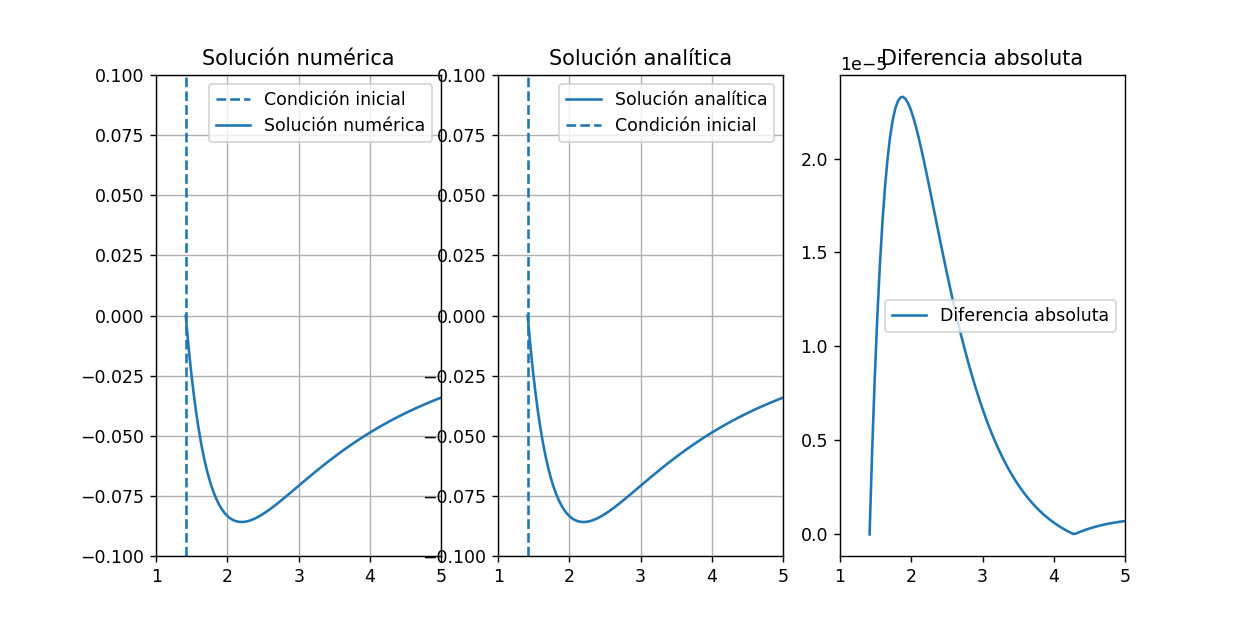

(<matplotlib.legend.Legend at 0x246722814c0>,
 None)

In [75]:
def RealFunktion(x):
    return 1/x**2 - 1/(x**2/2 + 1)

def f(x,y):
    return x*y**2-2*y/x-1/x**3

def GetEuler2(f,x):
    dx = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = 0
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i],y[i-1]+k1*dx)
        
        y[i] = y[i-1]+.5*(k1+k2)*dx
    
    return y

x = np.linspace(np.sqrt(2),5,100)

y_sol = GetEuler2(f,x)

figy_solv = plt.figure(figsize=(10,5))
ax1 = figy_solv.add_subplot(131)
ax2 = figy_solv.add_subplot(132)
ax3 = figy_solv.add_subplot(133)

ax1.set_title("Solución numérica")
ax2.set_title("Solución analítica")
ax3.set_title("Diferencia absoluta")



ax1.grid()
ax2.grid()

ax1.set_xlim(1,5)
ax1.set_ylim(-0.1,0.1)

ax2.set_xlim(1,5)
ax2.set_ylim(-0.1,0.1)

ax3.set_xlim(1,5)

ax1.vlines(np.sqrt(2),-0.1,0.1,linestyles="dashed",label="Condición inicial")
ax1.plot(x,y_sol,label="Solución numérica")

ax2.plot(x,RealFunktion(x),label="Solución analítica")
ax2.vlines(np.sqrt(2),-0.1,0.1,linestyles="dashed",label="Condición inicial")

ax3.plot(x,abs(RealFunktion(x)-y_sol),label="Diferencia absoluta")

ax1.legend(),ax2.legend(),ax3.legend(),plt.subplots_adjust()

---

**4.** Resolver analíticamente la ecuación diferencial no lineal:

$$\frac{du}{dt} = u^{q}, \ t \in \left[0, 10\right]$$

La solución exacta es: $u(t) = e^{t}$ para $q = 1$ y $u(t) = \left(t \cdot (1 - q) + 1 \right)^{\frac{1}{1 - q}}$ para $q < 1$ y $t \cdot (1 - q) + 1 > 0$.



---

**5.** Encontrar la solución numéricamente para algunos valores de $q = \left[0., 0.2, 0.4, 0.7, 0.9, 1.\right]$.

<IPython.core.display.Javascript object>


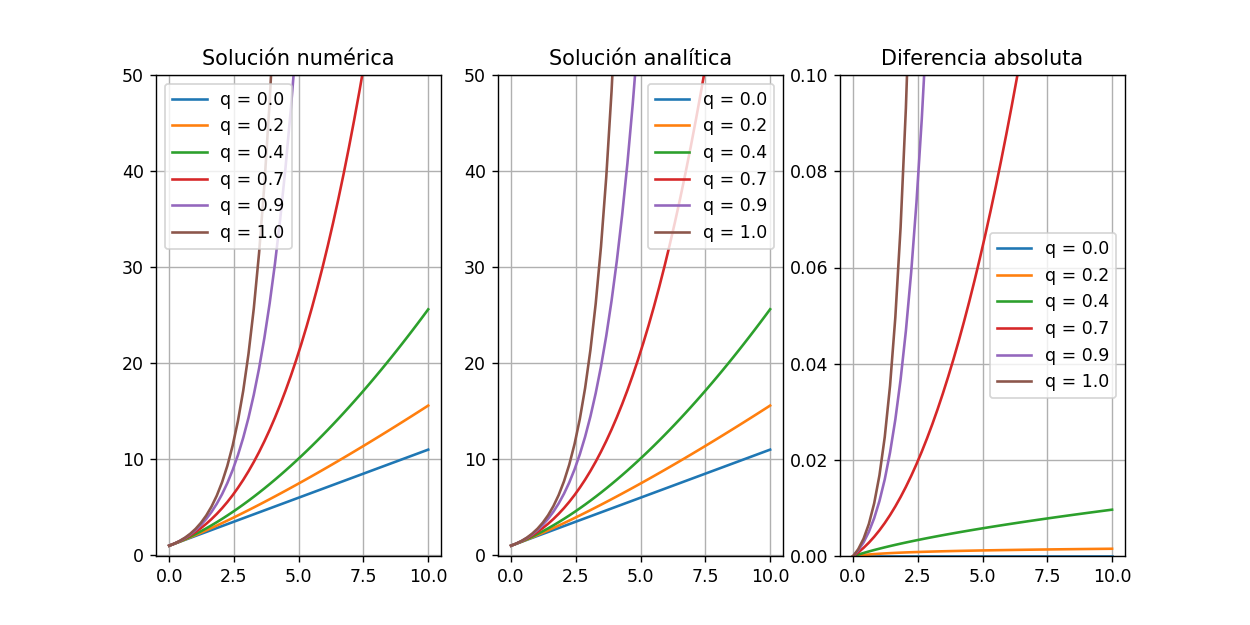

In [76]:
fig_solving = plt.figure(figsize=(10,5))
ax4 = fig_solving.add_subplot(131)
ax5 = fig_solving.add_subplot(132)
ax6 = fig_solving.add_subplot(133)

q = np.array([0.,.2,.4,.7,.9,1])

def Funktion(y,q):
    return y**q

def RealFunc(t,q):
    return (t*(1-q)+1)**(1/(1-q))

def GetEuler2(f,x,q):
    dx = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = 1
    for i in range(1,len(x)):
        k1 = f(y[i-1],q)
        k2 = f(y[i-1]+k1*dx,q)
        
        y[i] = y[i-1]+.5*(k1+k2)*dx
    
    return y

t = np.linspace(0,10)
y_solv = [0]*len(q)
ax4.set_ylim(-0.1,50)
ax4.grid()
ax5.set_ylim(-0.1,50)
ax5.grid()
ax6.set_ylim(0,0.1)
ax6.grid()

for i,j in enumerate(q):
    y_solv[i] = GetEuler2(Funktion,t,j)
    ax4.plot(t,y_solv[i],label="q = %s"%(j))
    
for i in q:
    if not i == 1:
        ax5.plot(t,RealFunc(t,i),label="q = %s"%(i))
        
    else:
        ax5.plot(t,np.exp(t),label="q = %s"%(i))

for i,j in enumerate(q):
    if not j == 1:
        ax6.plot(t,abs(y_solv[i]-RealFunc(t,j)),label="q = %s"%(j))
    else:
        ax6.plot(t,abs(y_solv[i]-np.exp(t)),label="q = %s"%(j))
        
ax4.set_title("Solución numérica")
ax5.set_title("Solución analítica")
ax6.set_title("Diferencia absoluta")

ax4.legend()
ax5.legend()
ax6.legend()



---

**6. Precesión de la órbita de Mercurio:** [Contexto entero en las notas de clase]. Demuestre las expresiones de las siguientes ecuaciones:

$$\vec{r}(t + \Delta t) = \vec{r}(t) + \vec{v}(t)\Delta t + \frac{1}{2}\vec{a}(t)\left(\Delta t\right)^{2},\qquad \vec{v}(t + \Delta t) = \vec{v}(t) + \frac{\Delta t}{2} \left(\vec{a}(t + \Delta t)  + \vec{a}(t) \right)$$

$$\vec{r}(0) = \left[a \cdot (1 + e), \ 0.\right], \qquad \vec{v}(0) = \left[0.,\ \sqrt{G \cdot \frac{1 - e}{a \cdot (1 + e)}} \right]$$

---

Genere una simulación en la que use un paso temporal del mismo orden de $\alpha \approx \Delta t$ para poder medir el efecto de la precesión. Genere al menos 10 órbitas alrededor del Sol guardando en un archivo de datos el tiempo en años terrestres que tarda mercurio en llegar al perihelio y el ángulo de llegada que debe ser cercano a $180^{\circ}$. Usando el archivo de datos grafique 2 veces el ángulo de llegada vs 2 veces el tiempo en años terrestre que le toma en llegar de nuevo al perihelio.